In [1]:
import pandas as pd
import numpy as np
import pymc3 as mc

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
df=pd.read_csv('frax.csv')
df.head()

,Unnamed: 0,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk,balance_q,credl_q,Segmento
0,1,1,35,1,3000,4,14,2,0,2,1,3
1,2,0,2,1,0,9,0,18,0,1,4,3
2,3,0,2,1,0,27,9,16,0,1,4,3
3,4,1,15,1,0,12,0,5,0,1,2,3
4,5,1,46,1,0,11,16,7,0,1,3,3


In [17]:
with mc.Model() as model:
    a_0 = mc.Normal('a_0', mu=0.0, tau=1 / (2 ** 2), shape=1)
    a_1 = mc.Normal('a_1', mu=0.0, tau=1 / (2 ** 2), shape=1)
    a_2 = mc.Normal('a_2', mu=0.0, tau=1 / (2 ** 2), shape=1)
    a_3 = mc.Normal('a_3', mu=0.0, tau=1 / (2 ** 2), shape=1)
    a_4 = mc.Normal('a_4', mu=0.0, tau=1 / (2 ** 2), shape=1)
    a_5 = mc.Normal('a_5', mu=0.0, tau=1 / (2 ** 2), shape=1)
    a_6 = mc.Normal('a_6', mu=0.0, tau=1 / (2 ** 2), shape=1)

In [18]:
a_0

a_0

In [28]:
with mc.Model() as model:
    x = np.array([85, 95, 70, 65, 70, 90, 75, 85, 80, 85])
    y = np.array([1., 1., 0., 0., 0., 1., 1., 0., 0., 1.])

    w0 = mc.Normal('w0', 0, 0.000001)
    w1 = mc.Normal('w1', 0, 0.000001)

    #@mc.deterministic
    def logistic(w0=w0, w1=w1, x=x):
        return 1.0 / (1. + np.exp(-(w0 + w1 * x)))

    observed = mc.Bernoulli('observed', logistic, observed=logistic(w0, w1, x))

AsTensorError: ('Cannot convert <function logistic at 0x7f0fb69bfea0> to TensorType', <class 'function'>)

In [3]:
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import theano.tensor as t
from scipy.stats import mode
def tinvlogit(x):
    return t.exp(x) / (1 + t.exp(x))
df.head()
#df=pd.read_csv('/home/ryan/Documents/thads2013n.txt',sep=',') df=df[df['BURDEN']>0] df=df[df['AGE1']>0] df['OWN']=[1 if obj=='2' else 0 for obj in df['OWNRENT']]

,Unnamed: 0,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk,balance_q,credl_q,Segmento
0,1,1,35,1,3000,4,14,2,0,2,1,3
1,2,0,2,1,0,9,0,18,0,1,4,3
2,3,0,2,1,0,27,9,16,0,1,4,3
3,4,1,15,1,0,12,0,5,0,1,2,3
4,5,1,46,1,0,11,16,7,0,1,3,3


In [5]:
%matplotlib inline
with pm.Model() as model: 
    # Define priors
    intercept = pm.Normal('Intercept', 0, sd=20)
    x_coeff = pm.Normal('numTrans', 0, sd=20)
    price_coef = pm.Normal('numIntlTrans', 0, sd=20)
    
    
    
    # Define likelihood
    likelihood = pm.Bernoulli('y', 
                              p=pm.math.sigmoid(intercept+x_coeff*df['numTrans']+price_coef*df['numIntlTrans']),
                              observed=df['fraudRisk'])
    WTP=pm.Deterministic('WTP',p)

    # Inference!
    trace = pm.sample(3000)
    
pm.traceplot(trace)

NameError: name 'p' is not defined

In [85]:
trace['y']

KeyError: 'Unknown variable y'

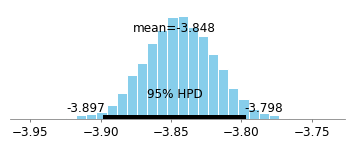

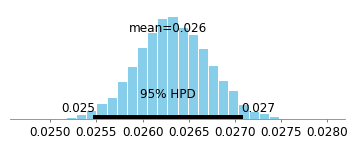

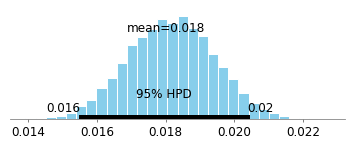

In [13]:
pm.plot_posterior(trace['Intercept'])
pm.plot_posterior(trace['numTrans'])
pm.plot_posterior(trace['numIntlTrans'])
plt.show()

In [37]:
print(mode(trace['WTP']))

ModeResult(mode=array([-1.48619157]), count=array([3]))


In [4]:
# %load std_ipython_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from scipy.stats import beta
from scipy.special import expit
from matplotlib import gridspec
from IPython.display import Image

%matplotlib inline
plt.style.use('seaborn-white')

color = '#87ceeb'

f_dict = {'size':16}

In [57]:
def plot_mustache(o, k, j, width=.65, ax=None):
    for i in np.arange(0, len(o), int(len(o)*.1)):
        a = o[i]*(k[i]-2)+1
        b = (1-o[i])*(k[i]-2)+1
        rv = beta(a,b)
                
        yrange = np.linspace(rv.ppf(0.025), rv.ppf(0.975), 100)
        xrange = rv.pdf(yrange)
        
        # When the SD of a group is large compared to others, then the top of its mustache is relatively
        # low and does not plot well together with low SD groups.
        # Scale the xrange so that the 'height' of the all mustaches is 0.75
        xrange_scaled = xrange*(width/xrange.max())
        
        # Using the negative value to flip the mustache in the right direction.
        ax.plot(-xrange_scaled+j, yrange, color=color, alpha=.5)

In [5]:
from sklearn.cross_validation import train_test_split 
X = df[['gender','cardholder','balance','numTrans','numIntlTrans','creditLine','Segmento']]
y = df['fraudRisk']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=6)
c_train=X_train['Segmento']
c_test=X_test['Segmento']

from sklearn import preprocessing 
scalerx = preprocessing.StandardScaler().fit(X_train[['gender','cardholder','balance','numTrans','numIntlTrans','creditLine']])
X_train=scalerx.transform(X_train[['gender','cardholder','balance','numTrans','numIntlTrans','creditLine']])
X_test=scalerx.transform(X_test[['gender','cardholder','balance','numTrans','numIntlTrans','creditLine']])


/home/abraham/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
zX = X_train
y=y_train

nclase=len(c_train.unique())
clase_idx=c_train.values
clase_idx

array([3, 3, 3, ..., 3, 3, 3])

In [8]:
nclase

3

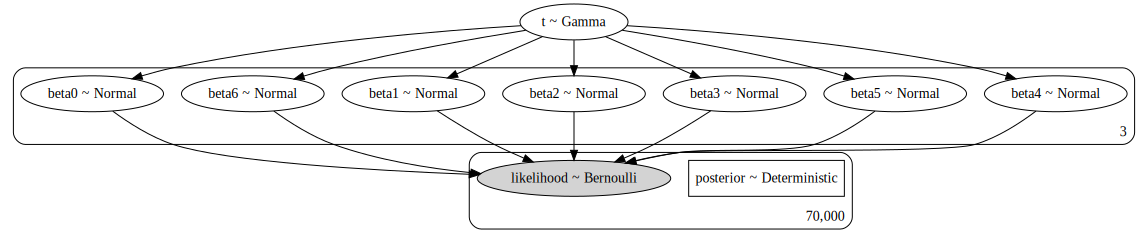

In [8]:
from pymc3 import Model, sample, Normal, HalfCauchy, Uniform, model_to_graphviz
with pm.Model() as model_weight:
    
    t=pm.Gamma('t',alpha=0.001,beta=0.001)
    
    beta0 = pm.Normal('beta0', mu=0, tau=t,shape=nclase)
    beta1 = pm.Normal('beta1', mu=0, tau=t,shape=nclase)
    beta2 = pm.Normal('beta2', mu=0, tau=t,shape=nclase)
    beta3 = pm.Normal('beta3', mu=0, tau=t,shape=nclase)
    beta4 = pm.Normal('beta4', mu=0, tau=t,shape=nclase)
    beta5 = pm.Normal('beta5', mu=0, tau=t,shape=nclase)
    beta6 = pm.Normal('beta6', mu=0, tau=t,shape=nclase)
            
        
    p = pm.invlogit(beta0[clase_idx-1] + beta1[clase_idx-1]*zX[:,0]+beta2[clase_idx-1]*zX[:,1]
                    +beta3[clase_idx-1]*zX[:,2]+beta4[clase_idx-1]*zX[:,3]+
                   beta5[clase_idx-1]*zX[:,4]+beta6[clase_idx-1]*zX[:,5])
        
    likelihood = pm.Bernoulli('likelihood', p, observed=y.values)
    
    posterior=pm.Deterministic('posterior',likelihood*1)

model_to_graphviz(model_weight)

In [9]:
with model_weight:
    trace1 = pm.sample(10000,tune=1000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta6, beta5, beta4, beta3, beta2, beta1, beta0, t]
Sampling 2 chains: 100%|██████████| 22000/22000 [1:45:37<00:00,  1.99draws/s]   


In [ ]:
#pm.traceplot(trace1)
pm.plot_posterior(trace1['posterior'][:,0])

/home/abraham/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


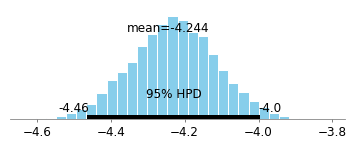

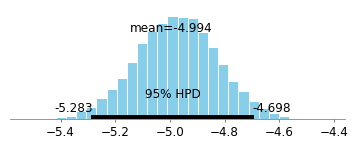

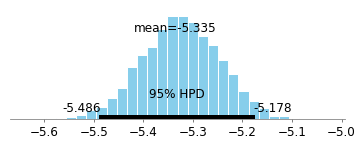

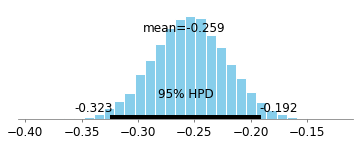

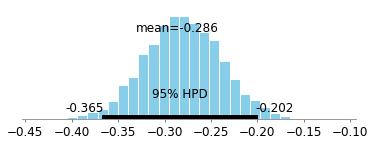

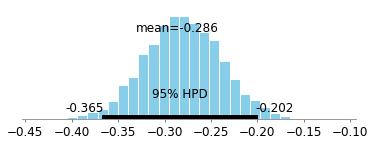

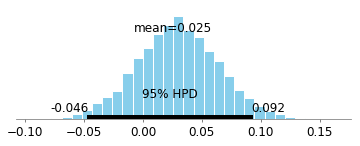

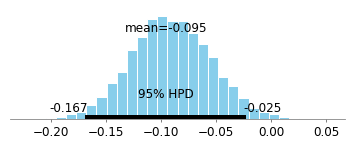

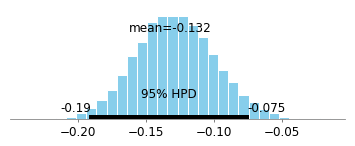

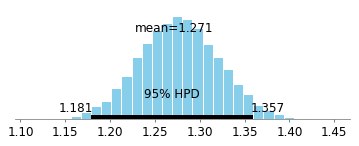

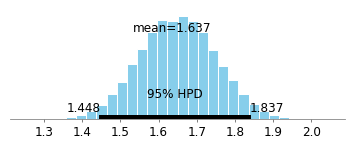

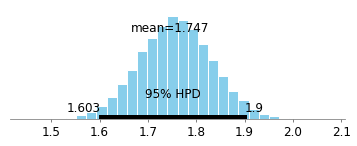

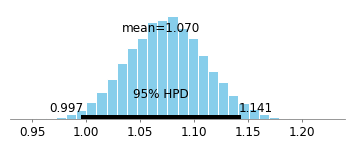

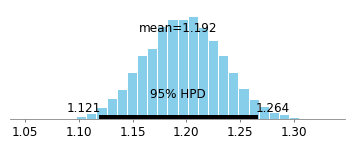

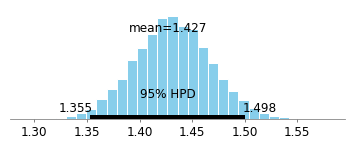

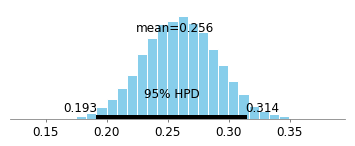

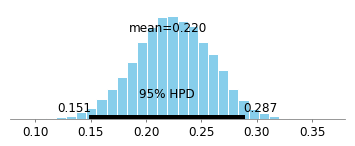

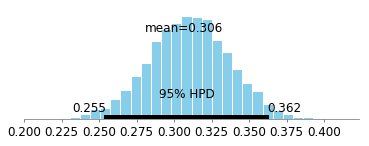

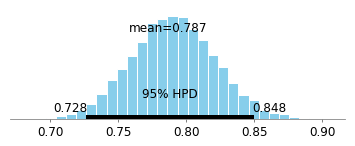

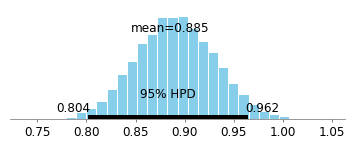

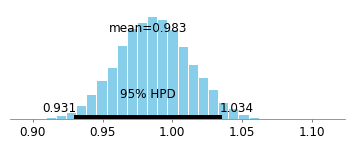

In [67]:
#'state','cardholder','balance','numTrans','numIntlTrans','creditLine'
pm.plot_posterior(trace1['beta0'][:,0])
pm.plot_posterior(trace1['beta0'][:,1])
pm.plot_posterior(trace1['beta0'][:,2])
pm.plot_posterior(trace1['beta1'][:,0])
pm.plot_posterior(trace1['beta1'][:,1])
pm.plot_posterior(trace1['beta1'][:,1])
pm.plot_posterior(trace1['beta2'][:,0])
pm.plot_posterior(trace1['beta2'][:,1])
pm.plot_posterior(trace1['beta2'][:,2])
pm.plot_posterior(trace1['beta3'][:,0])
pm.plot_posterior(trace1['beta3'][:,1])
pm.plot_posterior(trace1['beta3'][:,2])
pm.plot_posterior(trace1['beta4'][:,0])
pm.plot_posterior(trace1['beta4'][:,1])
pm.plot_posterior(trace1['beta4'][:,2])
pm.plot_posterior(trace1['beta5'][:,0])
pm.plot_posterior(trace1['beta5'][:,1])
pm.plot_posterior(trace1['beta5'][:,2])
pm.plot_posterior(trace1['beta6'][:,0])
pm.plot_posterior(trace1['beta6'][:,1])
pm.plot_posterior(trace1['beta6'][:,2])
plt.show()

In [83]:
list(trace1)

[{'beta0': array([-4.23669199, -4.9484534 , -5.30266532]),
  'beta1': array([-0.2156606 , -0.27405061, -0.30135737]),
  'beta2': array([ 0.0335726 , -0.13130911, -0.13828161]),
  'beta3': array([ 1.23395561,  1.62853645,  1.72722901]),
  'beta4': array([ 1.07844731,  1.20290573,  1.41356188]),
  'beta5': array([ 0.2763996 ,  0.17998814,  0.30712054]),
  'beta6': array([ 0.82454587,  0.86844958,  0.9527249 ]),
  't': 0.19345357304611221,
  't_log__': -1.642717727878958},
 {'beta0': array([-4.26796985, -5.07171036, -5.31595156]),
  'beta1': array([-0.23560568, -0.22007126, -0.36340303]),
  'beta2': array([ 0.07407483, -0.09977498, -0.11544504]),
  'beta3': array([ 1.27357943,  1.71919416,  1.73016843]),
  'beta4': array([ 1.08555004,  1.15383286,  1.42588217]),
  'beta5': array([ 0.26138076,  0.26212145,  0.3000708 ]),
  'beta6': array([ 0.78069844,  0.86822398,  0.9989401 ]),
  't': 0.20834203872747761,
  't_log__': -1.5685741328949587},
 {'beta0': array([-4.18145152, -5.02700109, -5.29

100%|██████████| 100/100 [00:01<00:00, 59.79it/s]


TypeError: slice indices must be integers or None or have an __index__ method

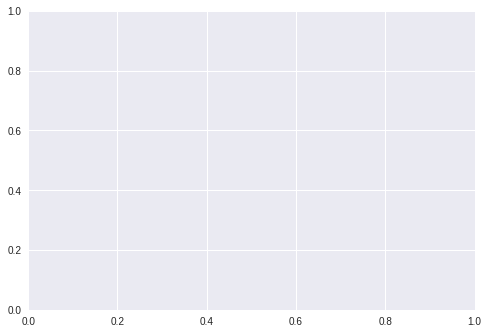

In [72]:
import seaborn as sns; sns.set()
ppc=pm.sample_ppc(trace1, model=model_weight, samples=100)
sns.kdeplot(y, alpha=0.5, lw=4, c='b')
for i in range(100):
    sns.kdeplot(ppc['likelihood'][i], alpha=0.1, c='g')

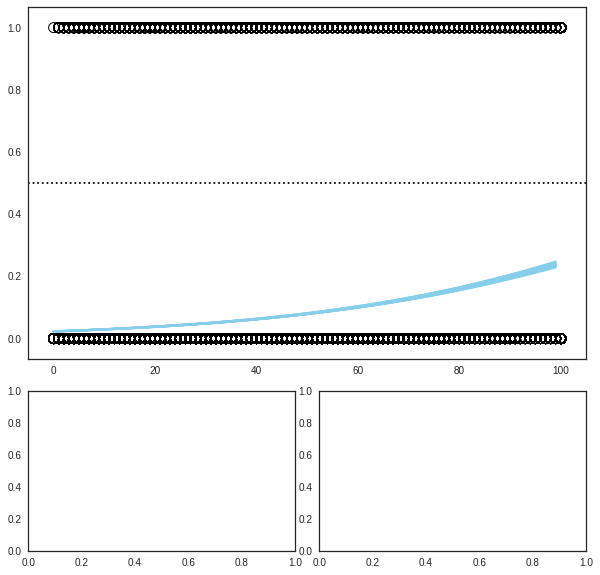

In [66]:
# Transform parameters back to original scale
beta0 = trace1['beta0'] - trace1['zbetaj']*meanx[1]/scalex[1]
betaj = (trace1['betaj']/scalex[1])

plt.figure(figsize=(10,10))
# Define gridspec
gs = gridspec.GridSpec(3, 4)
ax1 = plt.subplot(gs[:2,:4])
ax2 = plt.subplot(gs[2,:2])
ax3 = plt.subplot(gs[2,2:])

ax1.scatter(df.numTrans, df.fraudRisk, s=100, edgecolor='k', facecolors='None', lw=1)

# Take 20 values from the posterior distribution and plot the lines
n_curves = 20
tr_len = len(trace1)
stepIdxVec = np.arange(0, tr_len, tr_len//n_curves)
weight_span = np.arange(df.numTrans.min(), df.numTrans.max())
weights = np.tile(weight_span.reshape(-1,1), (1,n_curves))
# The expit function from scipy.special calculates the inverse of the logit function
p = expit(beta0[stepIdxVec] + betaj[stepIdxVec]*weights)
ax1.plot(weights, p, c=color)

ax1.axhline(y=0.5, color='k', linestyle='dotted')



In [71]:
# Look up weights for which of the posterior probabilities is (close to) 0.5
decision_boundary = weight_span[np.any(np.isclose(p, 0.1, atol=0.01), axis=1)]
# Highlight the weightspan
ax1.axvspan(decision_boundary.min(), decision_boundary.max(),
            0, 0.5, color=color, alpha=0.3)

ax1.set_xlabel('numTrans')
ax1.set_ylabel('fraudRisk')
ax1.set_title('Data with Post. Pred.')

pm.plot_posterior(beta0, point_estimate='mode', ax=ax2, color=color)
ax2.set_title('Intercept', fontdict=f_dict)
ax2.set_xlabel(r'$\beta_0$', fontdict=f_dict)

pm.plot_posterior(betaj, point_estimate='mode', ax=ax3, color=color)
ax3.set_title('numTrans', fontdict=f_dict)
ax3.set_xlabel(r'$\beta_1$', fontdict=f_dict);

plt.tight_layout();

In [77]:
import pydot
from pydot import*
print (pydot.find_graphviz())

AttributeError: module 'pydot' has no attribute 'find_graphviz'